In [1]:
import pathlib
from xclim import subset
import xarray
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Path to both files
data = pathlib.Path("/home/mlopez/EXEC/Processed Data Varibales/NorESM1-M_rcp85_tg_mean_annual.nc")
json = pathlib.Path("/home/mlopez/EXEC/Shapefiles/territoire_guide.shp")

# Exploring shapefile

In [3]:
shape = gpd.read_file(json)
#Reading Shapefiles in right coordinate system
shape = shape.to_crs({'init': 'epsg:4326'})
shape.head()

,TER_GUIDE,geometry
0,1a,"MULTIPOLYGON (((-72.70926 46.28173, -72.69524 ..."
1,2a,"POLYGON ((-76.08748 46.47438, -76.08807 46.475..."
2,2b,"MULTIPOLYGON (((-70.81729 47.01784, -70.81045 ..."
3,2c,"POLYGON ((-72.38130 45.65191, -72.38112 45.652..."
4,3ab,"POLYGON ((-79.06541 47.29977, -79.06474 47.299..."


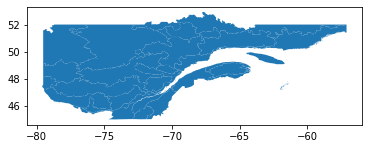

In [4]:
shape.plot()

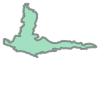

In [5]:
shape.geometry[1]

# Processing NetCDF

In [6]:
ds = xarray.open_dataset(data)
ds

<xarray.Dataset>
Dimensions:  (lat: 320, lon: 416, time: 151)
Coordinates:
  * time     (time) object 1950-01-01 00:00:00 ... 2100-01-01 00:00:00
  * lon      (lon) float32 -89.04521 -88.96188 -88.87855 ... -54.54659 -54.46326
  * lat      (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
Data variables:
    tg_mean  (time, lat, lon) float32 ...
Attributes:
    Conventions:     CF-1.5
    title:           NorESM1-M model output prepared for CMIP5 historical
    history:         2011-06-01T01:20:15Z CMOR rewrote data to comply with CF...
    institution:     Norwegian Climate Centre
    source:          NorESM1-M 2011  atmosphere: CAM-Oslo (CAM4-Oslo-noresm-v...
    redistribution:  Redistribution prohibited. For internal use only.

In [7]:
#Change date time index  to convert in dataframe
nds = ds.indexes['time'].to_datetimeindex()
nds

DatetimeIndex(['1950-01-01', '1951-01-01', '1952-01-01', '1953-01-01',
               '1954-01-01', '1955-01-01', '1956-01-01', '1957-01-01',
               '1958-01-01', '1959-01-01',
               ...
               '2091-01-01', '2092-01-01', '2093-01-01', '2094-01-01',
               '2095-01-01', '2096-01-01', '2097-01-01', '2098-01-01',
               '2099-01-01', '2100-01-01'],
              dtype='datetime64[ns]', length=151, freq=None)

In [8]:
ds['time'] = nds
ds

<xarray.Dataset>
Dimensions:  (lat: 320, lon: 416, time: 151)
Coordinates:
  * time     (time) datetime64[ns] 1950-01-01 1951-01-01 ... 2100-01-01
  * lon      (lon) float32 -89.04521 -88.96188 -88.87855 ... -54.54659 -54.46326
  * lat      (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
Data variables:
    tg_mean  (time, lat, lon) float32 ...
Attributes:
    Conventions:     CF-1.5
    title:           NorESM1-M model output prepared for CMIP5 historical
    history:         2011-06-01T01:20:15Z CMOR rewrote data to comply with CF...
    institution:     Norwegian Climate Centre
    source:          NorESM1-M 2011  atmosphere: CAM-Oslo (CAM4-Oslo-noresm-v...
    redistribution:  Redistribution prohibited. For internal use only.

In [9]:
#Converting netCDF to dataframe
df = ds.to_dataframe().reset_index().dropna()
df 

,lat,lon,time,tg_mean
0,66.623306,-89.045212,1950-01-01,260.487122
1,66.623306,-89.045212,1951-01-01,259.087128
2,66.623306,-89.045212,1952-01-01,258.688416
3,66.623306,-89.045212,1953-01-01,257.983765
4,66.623306,-89.045212,1954-01-01,259.069092
...,...,...,...,...
20065630,40.041039,-74.045807,2096-01-01,289.984100
20065631,40.041039,-74.045807,2097-01-01,290.481293
20065632,40.041039,-74.045807,2098-01-01,290.068420
20065633,40.041039,-74.045807,2099-01-01,290.675110


In [10]:
#Converting dataframe into geodataframe, creatin geometry column
geom = [Point(x, y) for x, y in zip(df['lon'], df['lat'])]
gdf = gpd.GeoDataFrame(df, geometry=geom)
gdf

,lat,lon,time,tg_mean,geometry
0,66.623306,-89.045212,1950-01-01,260.487122,POINT (-89.04521 66.62331)
1,66.623306,-89.045212,1951-01-01,259.087128,POINT (-89.04521 66.62331)
2,66.623306,-89.045212,1952-01-01,258.688416,POINT (-89.04521 66.62331)
3,66.623306,-89.045212,1953-01-01,257.983765,POINT (-89.04521 66.62331)
4,66.623306,-89.045212,1954-01-01,259.069092,POINT (-89.04521 66.62331)
...,...,...,...,...,...
20065630,40.041039,-74.045807,2096-01-01,289.984100,POINT (-74.04581 40.04104)
20065631,40.041039,-74.045807,2097-01-01,290.481293,POINT (-74.04581 40.04104)
20065632,40.041039,-74.045807,2098-01-01,290.068420,POINT (-74.04581 40.04104)
20065633,40.041039,-74.045807,2099-01-01,290.675110,POINT (-74.04581 40.04104)


# Joining both files with sjoin

## Processing 150 years

In [14]:
gdf.shape

(11507106, 5)

In [15]:
gdf2 = gdf[gdf.time.dt.year<1954]
%time gdf2.sindex
#It takes 4 second per year

CPU times: user 17.3 s, sys: 761 ms, total: 18 s
Wall time: 18 s


In [16]:
#Creating index. This is what takes the longest. 11 min for 150 years
%time gdf.sindex

CPU times: user 11min 21s, sys: 11.7 s, total: 11min 33s
Wall time: 11min 34s


In [17]:
%time res = gpd.sjoin(gdf, shape, op="within")
#4min

CPU times: user 4min 23s, sys: 1min 35s, total: 5min 59s
Wall time: 1min 1s


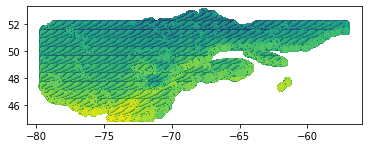

In [26]:
# Plotting map with temperature
res.plot('tg_mean')

In [18]:
%time mean_by_regions = res.groupby(["TER_GUIDE", "time"]).mean()

CPU times: user 640 ms, sys: 18.4 ms, total: 658 ms
Wall time: 744 ms


In [19]:
mean_by_regions

lat        lon     tg_mean  index_right
TER_GUIDE time                                                     
1a        1950-01-01  45.491516 -73.997895  279.998230            0
          1951-01-01  45.491516 -73.997895  279.172821            0
          1952-01-01  45.491516 -73.997895  278.483673            0
          1953-01-01  45.491516 -73.997895  278.490356            0
          1954-01-01  45.491516 -73.997895  278.652069            0
...                         ...        ...         ...          ...
6opqr     2096-01-01  51.852674 -65.344706  277.827667           24
          2097-01-01  51.852674 -65.344706  278.350983           24
          2098-01-01  51.852674 -65.344706  277.962067           24
          2099-01-01  51.852674 -65.344706  278.889526           24
          2100-01-01  51.852674 -65.344706  279.177673           24

[3775 rows x 4 columns]

In [28]:
mean_by_regions.reset_index().to_feather("tg_mean_by_regions.feather")

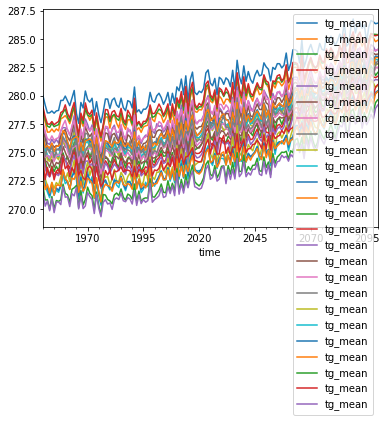

In [21]:
#Plotting average temperature by region
ax = plt.gca()
for (_,rdf) in mean_by_regions.reset_index().groupby("index_right"):
    rdf.plot("time", "tg_mean",ax=ax)